In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('/content/heart_disease_health_indicators_BRFSS2015.csv')
df

HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  \
0                        0.0     1.0       1.0        1.0  40.0     1.0   
1                        0.0     0.0       0.0        0.0  25.0     1.0   
2                        0.0     1.0       1.0        1.0  28.0     0.0   
3                        0.0     1.0       0.0        1.0  27.0     0.0   
4                        0.0     1.0       1.0        1.0  24.0     0.0   
...                      ...     ...       ...        ...   ...     ...   
253675                   0.0     1.0       1.0        1.0  45.0     0.0   
253676                   0.0     1.0       1.0        1.0  18.0     0.0   
253677                   0.0     0.0       0.0        1.0  28.0     0.0   
253678                   0.0     1.0       0.0        1.0  23.0     0.0   
253679                   1.0     1.0       1.0        1.0  25.0     0.0   

        Stroke  Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  \
0          0.0       0.0           0.0     0.0  ...            1.0   
1          0.0       0.0           1.0     0.0  ...            0.0   
2          0.0       0.0           0.0     1.0  ...            1.0   
3          0.0       0.0           1.0     1.0  ...            1.0   
4          0.0       0.0           1.0     1.0  ...            1.0   
...        ...       ...           ...     ...  ...            ...   
253675     0.0       0.0           0.0     1.0  ...            1.0   
253676     0.0       2.0           0.0     0.0  ...            1.0   
253677     0.0       0.0           1.0     1.0  ...            1.0   
253678     0.0       0.0           0.0     1.0  ...            1.0   
253679     0.0       2.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
0               0.0      5.0      18.0      15.0       1.0  0.0   9.0   
1               1.0      3.0       0.0       0.0       0.0  0.0   7.0   
2               1.0      5.0      30.0      30.0       1.0  0.0   9.0   
3               0.0      2.0       0.0       0.0       0.0  0.0  11.0   
4               0.0      2.0       3.0       0.0       0.0  0.0  11.0   
...             ...      ...       ...       ...       ...  ...   ...   
253675          0.0      3.0       0.0       5.0       0.0  1.0   5.0   
253676          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
253677          0.0      1.0       0.0       0.0       0.0  0.0   2.0   
253678          0.0      3.0       0.0       0.0       0.0  1.0   7.0   
253679          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

        Education  Income  
0             4.0     3.0  
1             6.0     1.0  
2             4.0     8.0  
3             3.0     6.0  
4             5.0     4.0  
...           ...     ...  
253675        6.0     7.0  
253676        2.0     4.0  
253677        5.0     2.0  
253678        5.0     1.0  
253679        6.0     2.0  

[253680 rows x 22 columns]

In [3]:
x,y=df[["HighBP","HighChol","CholCheck","BMI","Smoker","Stroke","Diabetes","PhysActivity","Fruits","Veggies","HvyAlcoholConsump","AnyHealthcare","NoDocbcCost","GenHlth","MentHlth","PhysHlth","DiffWalk","Age","Education","Income"]],df["HeartDiseaseorAttack"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split (x, y, test_size=0.2)

In [5]:
print('len(X_TRAIN:)',len(X_train))
print('len(X_TEST:)',len(X_test))

len(X_TRAIN:) 202944
len(X_TEST:) 50736


In [6]:

# Define the model
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=16, epochs=10, validation_data=(X_test, y_test))

# Predict probabilities on the test set
y_pred_probs = model.predict(X_test)

# Convert probabilities to classes
y_pred = np.round(y_pred_probs).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics and confusion matrix
print('Accuracy:', accuracy)
print('Recall:', recall)
print('Precision:', precision)
print('F1_score:', f1)

Epoch 1/10
12684/12684 [==============================] - 31s 2ms/step - loss: 0.2558 - accuracy: 0.9061 - val_loss: 0.2526 - val_accuracy: 0.9059
Epoch 2/10
12684/12684 [==============================] - 28s 2ms/step - loss: 0.2478 - accuracy: 0.9073 - val_loss: 0.2538 - val_accuracy: 0.9050
Epoch 3/10
12684/12684 [==============================] - 28s 2ms/step - loss: 0.2458 - accuracy: 0.9075 - val_loss: 0.2498 - val_accuracy: 0.9057
Epoch 4/10
12684/12684 [==============================] - 29s 2ms/step - loss: 0.2447 - accuracy: 0.9076 - val_loss: 0.2487 - val_accuracy: 0.9060
Epoch 5/10
12684/12684 [==============================] - 28s 2ms/step - loss: 0.2439 - accuracy: 0.9079 - val_loss: 0.2469 - val_accuracy: 0.9061
Epoch 6/10
12684/12684 [==============================] - 28s 2ms/step - loss: 0.2434 - accuracy: 0.9081 - val_loss: 0.2465 - val_accuracy: 0.9061
Epoch 7/10
12684/12684 [==============================] - 28s 2ms/step - loss: 0.2431 - accuracy: 0.9077 - val_loss: 0

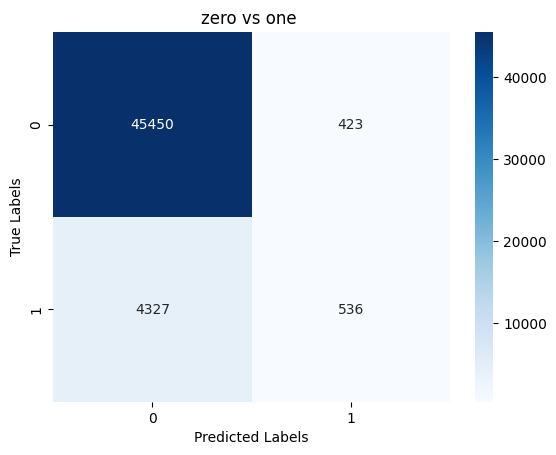

In [9]:
conf_mat = confusion_matrix(y_test, y_pred)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues",fmt='g')

# Add labels and title to the plot
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("zero vs one ")

# Show the plot
plt.show()

In [10]:
# calculate AUC score
auc_score = roc_auc_score(y_test, y_pred)

# print the AUC score
print("AUC score: {:.2f}".format(auc_score))

AUC score: 0.55


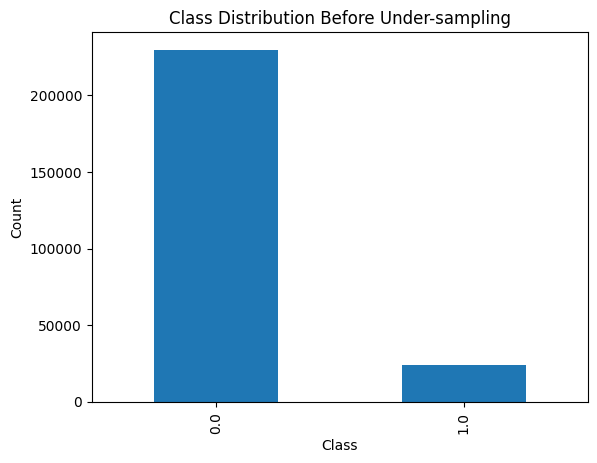

In [11]:
class_counts_before = y.value_counts()
class_counts_before.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution Before Under-sampling')
plt.show()

In [12]:
rus = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = rus.fit_resample(x, y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

In [14]:
print('len(X_TRAIN:)',len(X_train))
print('len(X_TEST:)',len(X_test))

len(X_TRAIN:) 38228
len(X_TEST:) 9558


In [15]:
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=16, epochs=10, validation_data=(X_test, y_test))

# Predict probabilities on the test set
y_pred_probs = model.predict(X_test)

# Convert probabilities to classes
y_pred = np.round(y_pred_probs).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics and confusion matrix
print('Accuracy:', accuracy)
print('Recall:', recall)
print('Precision:', precision)
print('F1_score:', f1)


Epoch 1/10
2390/2390 [==============================] - 8s 3ms/step - loss: 0.5296 - accuracy: 0.7346 - val_loss: 0.5255 - val_accuracy: 0.7382
Epoch 2/10
2390/2390 [==============================] - 5s 2ms/step - loss: 0.5073 - accuracy: 0.7536 - val_loss: 0.5048 - val_accuracy: 0.7490
Epoch 3/10
2390/2390 [==============================] - 6s 2ms/step - loss: 0.5026 - accuracy: 0.7542 - val_loss: 0.5052 - val_accuracy: 0.7460
Epoch 4/10
2390/2390 [==============================] - 6s 2ms/step - loss: 0.5004 - accuracy: 0.7567 - val_loss: 0.5094 - val_accuracy: 0.7519
Epoch 5/10
2390/2390 [==============================] - 6s 2ms/step - loss: 0.4978 - accuracy: 0.7571 - val_loss: 0.5029 - val_accuracy: 0.7546
Epoch 6/10
2390/2390 [==============================] - 6s 2ms/step - loss: 0.4968 - accuracy: 0.7586 - val_loss: 0.5025 - val_accuracy: 0.7529
Epoch 7/10
2390/2390 [==============================] - 6s 2ms/step - loss: 0.4952 - accuracy: 0.7590 - val_loss: 0.5025 - val_accuracy:

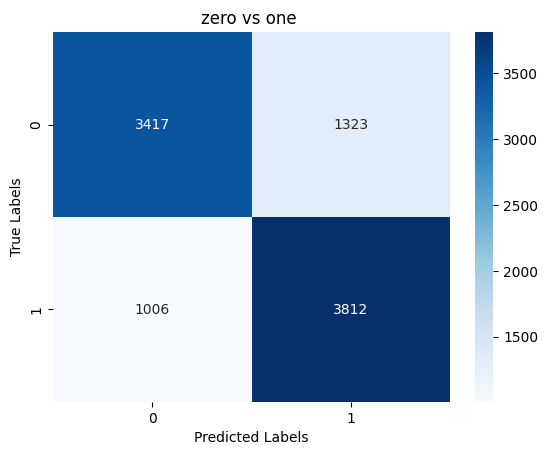

In [16]:
conf_mat = confusion_matrix(y_test, y_pred)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues",fmt='g')

# Add labels and title to the plot
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("zero vs one ")

# Show the plot
plt.show()

In [17]:
# calculate AUC score
auc_score = roc_auc_score(y_test, y_pred)

# print the AUC score
print("AUC score: {:.2f}".format(auc_score))

AUC score: 0.76


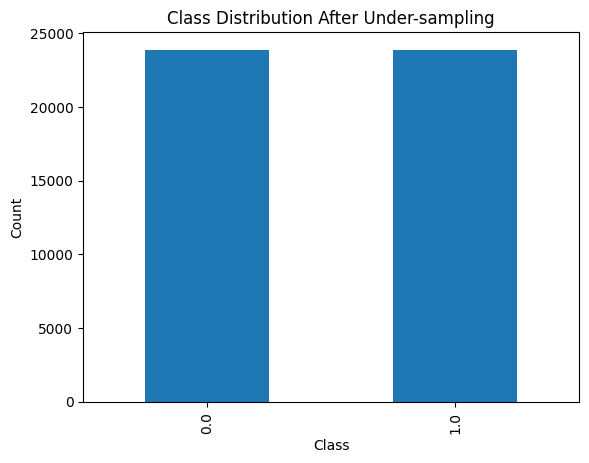

In [18]:
class_counts_after = pd.Series(y_resampled).value_counts()
class_counts_after.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution After Under-sampling')
plt.show()